<a href="https://colab.research.google.com/github/Antonio24ch/Proyecto-_Final-_de-_Analitica-_de-_Datos/blob/main/M4Lab_Visualizacion_de_Datos_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Laboratorio de Visualización de Datos**


Tiempo Estimado Necesario: **45 a 60** minutos


En esta tarea usted se centrará en la visualización de los datos.

El conjunto de datos le será presentado en la de forma de una RDBMS (Sistema de Gestión de Bases de Datos Relacionales)

Tendrá que utilizar consultas en SQL para extraer los datos.


## Objetivos


En este laboratorio realizará lo siguiente:


-   Visualizar la distribución de los datos

-   Visualizar la relación entre dos características

-   Visualizar la composición de los datos

-   Visualizar la comparación de los datos


<hr>


## Demostración: Como trabajar con la base de datos


Descargar el archivo de base de datos


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-07-18 20:06:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  41.5MB/s    in 0.8s    

2021-07-18 20:06:32 (41.5 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



Conectarse a la base de datos.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # abror una conexión con la base de datos

Importar el módulo pandas


In [3]:
import pandas as pd

## Demostración: Como ejecutar una consulta SQL


In [4]:
# imprimir cuantas filas hay en la tabla llamada 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# read_sql_query ejecuta la consulta sq1 y retorna los datos como dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demostración: Como listar todas las tablas


In [5]:
# imprimir todos los nombres de las tablas en la base de datos
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# read_sql_query ejecuta la consulta sq1 y retorna los datos como dataframe

pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demostración: Como ejecutar un grupo mediante una consulta


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demostración: Como describir una tabla


In [7]:
table_name = 'master'  # la tabla que desea describir 

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Manos a la Obra


## Visualizar la distribución de los datos


### Histogramas


Grafica un histograma de `ConvertedComp.`


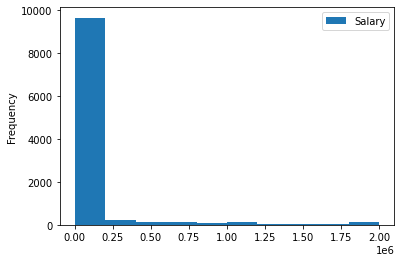

In [8]:
# su código va aquí
QUERY = """
SELECT ConvertedComp as Salary
FROM master
"""
conver = pd.read_sql_query(QUERY,conn)
conver.plot(kind='hist')


### Diagrama de Caja


Grafica un Diagrama de Caja de `Age.`


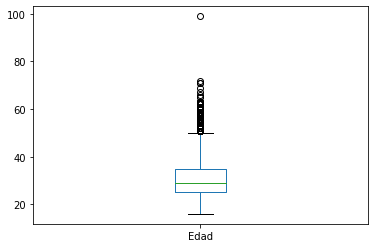

In [9]:
# su código va aquí
QUERY = """
SELECT Age as Edad
FROM master
"""
age = pd.read_sql_query(QUERY,conn)
age.plot(kind='box')

## Visualizar relaciones en los datos


### Diagrámas de Dispersión


Genera un Diagráma de Dispersión de `Age` y `WorkWeekHrs.`


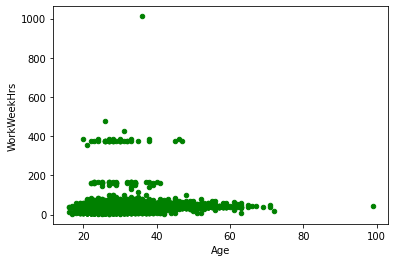

In [10]:
# su código va aquí
QUERY = """
SELECT Age ,WorkWeekHrs
FROM master
"""
scat = pd.read_sql_query(QUERY,conn)
scat.plot.scatter(x='Age',
                      y='WorkWeekHrs',
                      color='g')

### Gráfico de Burbujas


Genera un Gráfico de Burbujas de `WorkWeekHrs` y `CodeRevHrs`, utilizar la columna `Age` como tamaño de la burbuja.


In [11]:
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
"""
burbuja = pd.read_sql_query(QUERY,conn)

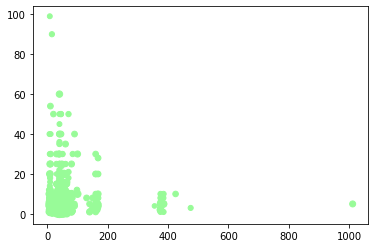

In [12]:
# su código va aquí
import matplotlib.pyplot as plt

x = burbuja['WorkWeekHrs']
y = burbuja['CodeRevHrs']
z = burbuja['Age']
burb = pd.concat([x,y,z])
plt.scatter(x, y, s=z,c='palegreen')
plt.show()


## Visualizar la Composición de los Datos


### Gráfico Circular


Genere un Gráfico Circular de las 5 primeras bases de datos sobre lo que los encuestados quieren aprender el próximo año. Etiquete el gráfico con los nombres de las bases de datos. Muestre los porcentajes de cada una en el gráfico.


In [13]:
QUERY = """
SELECT 	DatabaseWorkedWith as BasesdeDatos
FROM 	DatabaseWorkedWith
"""
netx_y = pd.read_sql_query(QUERY,conn)
to_learn = netx_y.value_counts()
to_learn

BasesdeDatos        
MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
dtype: int64

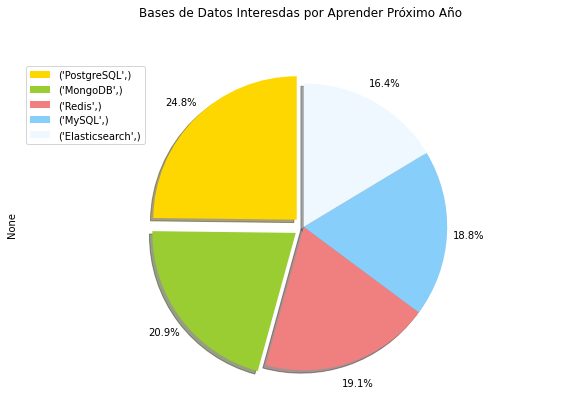

In [14]:
# su código va aquí
QUERY = """
SELECT 	DatabaseDesireNextYear as DB
FROM 	DatabaseDesireNextYear
"""
netx_y = pd.read_sql_query(QUERY,conn)
to_learn = netx_y.value_counts()
to_learn = to_learn[:5]

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'aliceblue']
explode_list = [0.07, 0.07, 0., 0, 0,]

to_learn.plot(kind='pie', figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.15,    
                            colors=colors_list,
                            explode=explode_list 
                            )

plt.title('Bases de Datos Interesdas por Aprender Próximo Año', y=1.12) 

plt.axis('equal') 

# añade etiqueta
plt.legend(labels=to_learn.index, loc='upper left') 

plt.show()

## Visualización de la comparación de los datos


### Gráfico de Líneas


Dibuje un Gráfico de Líneas de la mediana de `ConvertedComp` para todas las edades entre 45 y 60.


In [15]:
# su código va aquí
QUERY = """
SELECT Age, ConvertedComp 
FROM master
"""
conver = pd.read_sql_query(QUERY,conn)
values=[45,60]
filtered_df = conver[conver.Age.isin(values)].median()
filtered_df

Age                 45.0
ConvertedComp    91660.0
dtype: float64

### Gráfica de Barras


Genere un Gráfica de Barras horizontales utilizando la columna `MainBranch.`


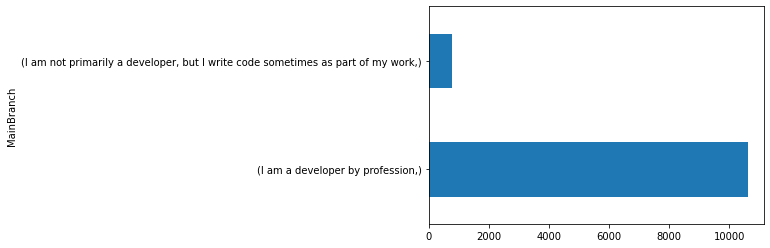

In [16]:
# su código va aquí
QUERY = """
SELECT MainBranch
FROM 	master
"""
main= pd.read_sql_query(QUERY,conn)

pbar = main.value_counts()
pbar.plot(kind='barh')

Cierre la conexión con la base de datos


In [17]:
conn.close()

## Autores


Ramesh Sannareddy


### Otros Colaboradores


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                |
| ----------------- | ------- | ----------------- | --------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Crear la versión inicial del lab. |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0121ES-Coursera-22673396&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0121ES-Coursera-22673396&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
